In [1]:
import numpy as np 
import plotting_utils as pl

In [2]:
general_directory = "/hpcwork/zu992399/look_elsewhere_paper/"
sig = np.array([0, 50, 100, 150,200, 250,300,400,500,600,700,800,900,1000])#, 2500, 3000])
sig_plot = np.array([0, 200, 400, 600, 800, 1000])#, 2500, 3000])
max_err = 0.2
points = np.array([])

# SIC for Signals

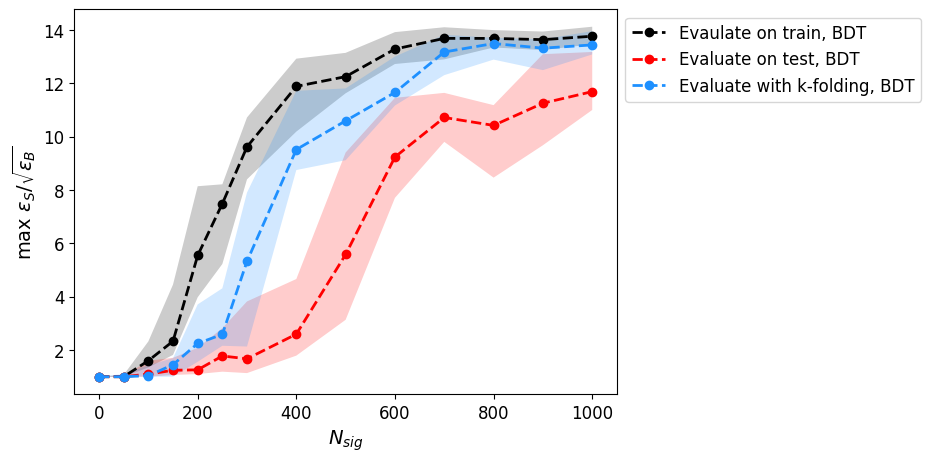

In [ ]:
sic = np.zeros((len(sig),len(points)+2))
sic_low = np.zeros((len(sig),len(points)+2))
sic_upp = np.zeros((len(sig),len(points)+2))

data_usage = ["train", "test", "kfolds"]
classifiers = ["BDT", "NN", "NN_noearlystopping"]
data_color = {"train": "black", "test": "red", "kfolds": "dodgerblue"}
data_name = {"train": "Evaulate on train", "test": "Evaluate on test", "kfolds": "Evaluate with k-folding"}
classifier_linestyle = {"BDT": "dashed", "NN": "solid", "NN_noearlystopping": "dotted"}
classifier_name = {"BDT": "BDT", "NN": "NN with early stopping", "NN_noearlystopping": "NN with early stopping"}

pl.plt.figure()
for i, d in enumerate(data_usage):
    for k,c in enumerate(classifiers):
        for j,s in enumerate(sig):
            sic[j], sic_low[j], sic_upp[j] = pl.read_ROC_SIC_1D("BDT", points, general_directory+"LHCO_"+c+"/"+d+"/Nsig_"+str(s)+"/")
        pl.plot_sic(sic[:,-1], sic_low[:,-1], sic_upp[:,-1], sig, data_color[d], data_name[d]+", "+classifier_name[c], linestyle=classifier_linestyle[c])
pl.plot_end_1D(sig_plot, "LHCO_signals")

# Calibration curves

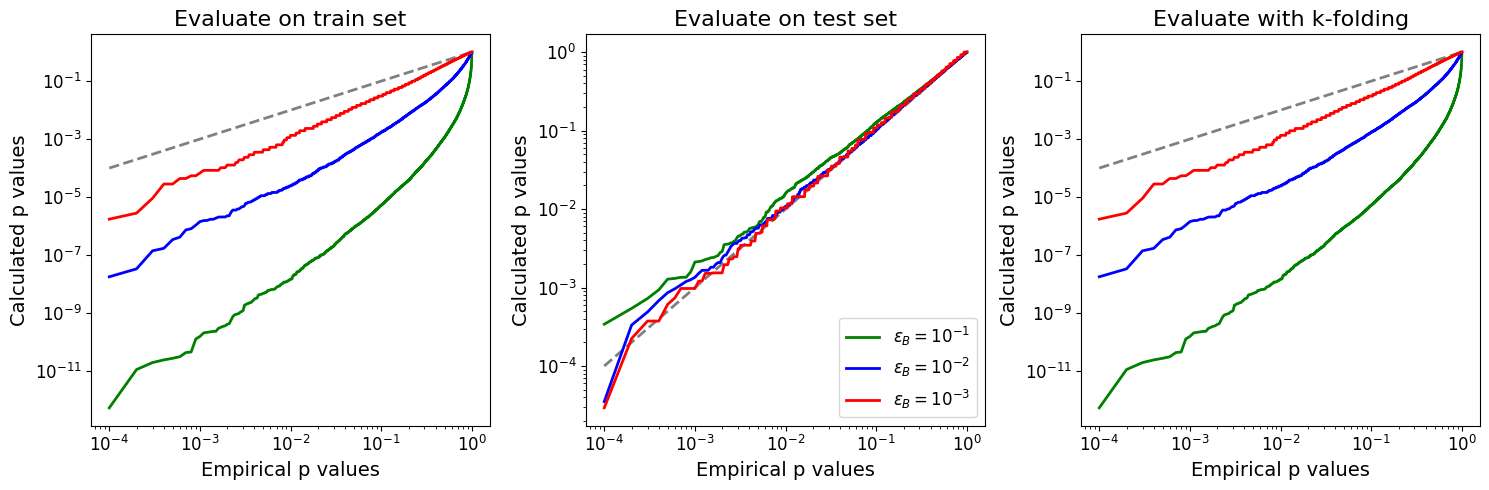

In [3]:
direc = general_directory+"LHCO_NN/"
p_train = np.sort(np.load(direc+"evaluate_on_train.npy"))
p_test = np.sort(np.load(direc+"evaluate_on_test_half.npy"))
p_kfolds = p_train
pl.calibration_curve_plot(p_train, p_test, p_kfolds, 10000, "LHCO_NN", NNBDT=True)

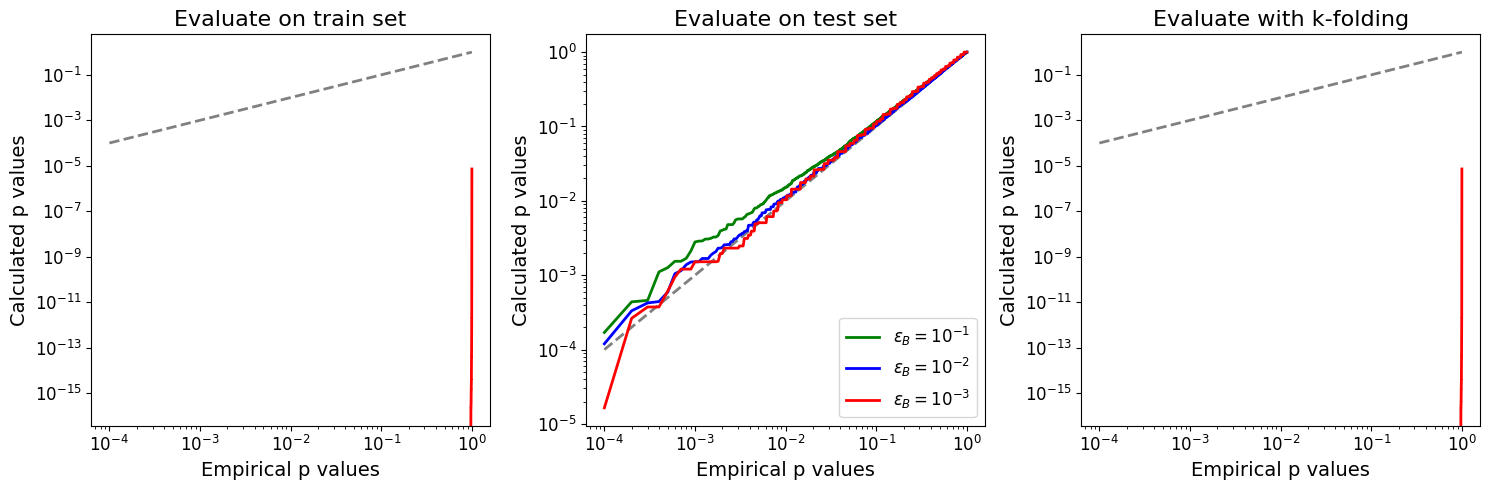

In [ ]:
direc = general_directory+"LHCO_NN_noearlystopping/"
p_train = np.sort(np.load(direc+"evaluate_on_train.npy"))
p_test = np.sort(np.load(direc+"evaluate_on_test_half.npy"))
p_kfolds = p_train
pl.calibration_curve_plot(p_train, p_test, p_kfolds, 10000, "LHCO_NN_noearlystopping", NNBDT=True)

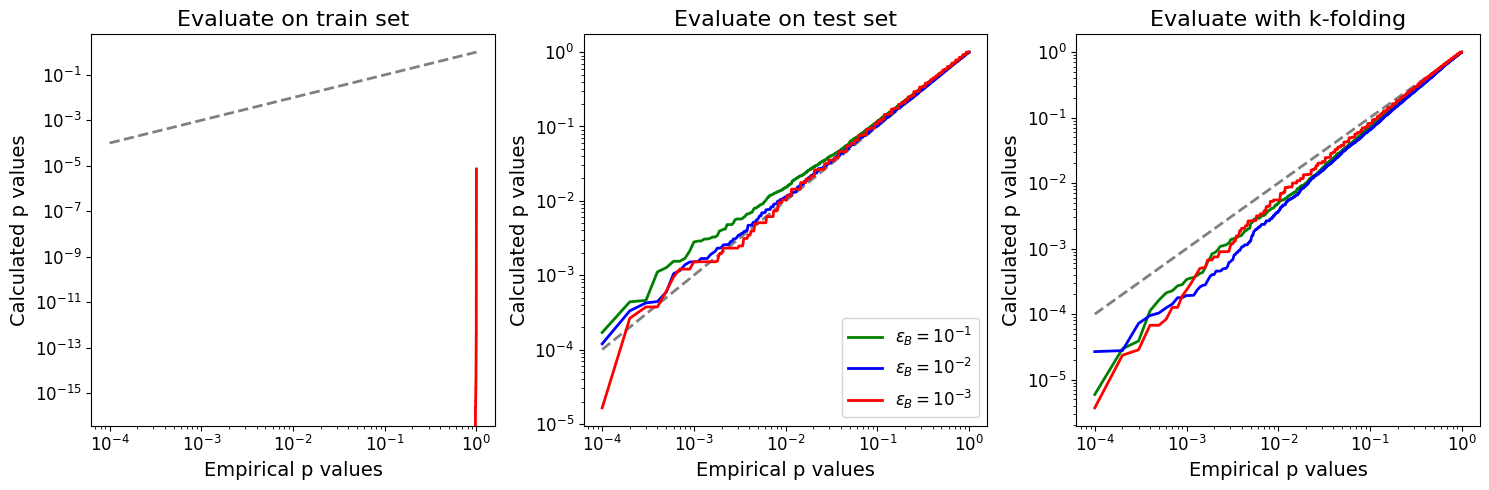

In [4]:
direc = general_directory+"LHCO_BDT/"
p_train = np.sort(np.load(direc+"evaluate_on_train.npy"))
p_test = np.sort(np.load(direc+"evaluate_on_test_half.npy"))
p_kfolds = np.sort(np.load(direc+"kfolds.npy"))
pl.calibration_curve_plot(p_train, p_test, p_kfolds, 10000, "LHCO_BDT", NNBDT=True)

# Trials factor calculation

# P-values for signals 